In [20]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

In [21]:
sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(sig_noise, np.ones(128), mode='same') / 128

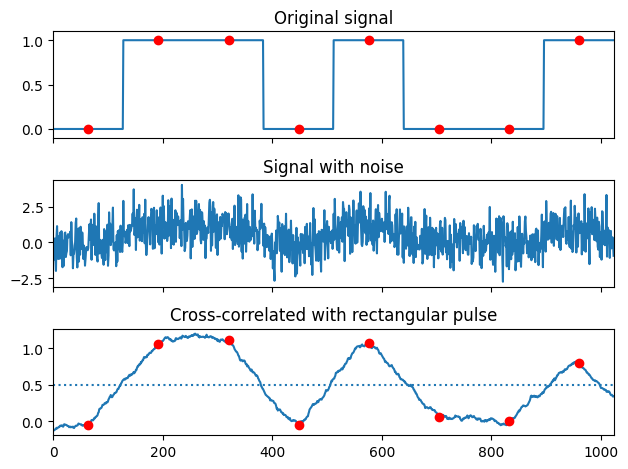

In [22]:
clock = np.arange(64, len(sig), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()

In [23]:
x = np.arange(128) / 128
sig = np.sin(2 * np.pi * x)
sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(sig_noise, sig)
lags = signal.correlation_lags(len(sig), len(sig_noise))
corr /= np.max(corr)

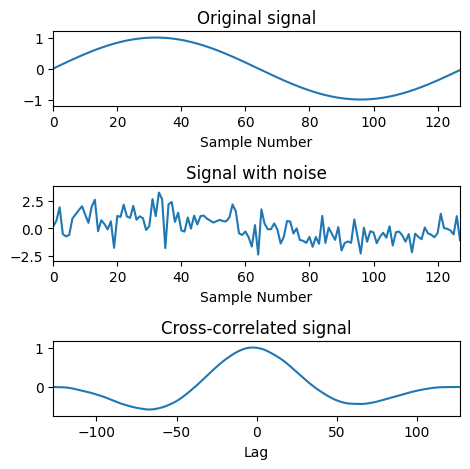

In [24]:
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(4.8, 4.8))
ax_orig.plot(sig)
ax_orig.set_title('Original signal')
ax_orig.set_xlabel('Sample Number')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_noise.set_xlabel('Sample Number')
ax_corr.plot(lags, corr)
ax_corr.set_title('Cross-correlated signal')
ax_corr.set_xlabel('Lag')
ax_orig.margins(0, 0.1)
ax_noise.margins(0, 0.1)
ax_corr.margins(0, 0.1)
fig.tight_layout()
plt.show()

In [26]:
import numpy as np

# First signal 
sig1 = np.sin(np.r_[-1:1:0.1])

# Seconds signal with pi/4 phase shift. Half the size of sig1
sig2 = np.sin(np.r_[-1:0:0.1] + np.pi/4)

In [27]:
corr = (len(sig1) - len(sig2) + 1) * [0]

# Go through lag components one-by-one
for l in range(len(corr)):
    corr[l] = sum([sig1[i+l] * sig2[i] for i in range(len(sig2))])

print(corr)

[-0.471998494510103, -0.24686753498102817, -0.019269956645980538, 0.20852016072607304, 0.4342268135797527, 0.6555948156484444, 0.8704123310300105, 1.076532974119988, 1.271897255587048, 1.4545531601096169, 1.62267565026772]
